In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('uber - uber.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Unnamed: 0         200000 non-null  int64  
 1   key                200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 13.7+ MB


In [3]:
df.shape

(200000, 9)

In [4]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [5]:
df.head(7)

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 8:22:21,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5
5,44470845,2011-02-12 2:27:09,4.9,2011-02-12 02:27:09 UTC,-73.969019,40.755910,-73.969019,40.755910,1
6,48725865,2014-10-12 7:04:00,24.5,2014-10-12 07:04:00 UTC,-73.961447,40.693965,-73.871195,40.774297,5


In [6]:
df.isnull()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
199995,False,False,False,False,False,False,False,False,False
199996,False,False,False,False,False,False,False,False,False
199997,False,False,False,False,False,False,False,False,False
199998,False,False,False,False,False,False,False,False,False


In [9]:
df.dropna(inplace=True)
df.drop(columns=["Unnamed: 0", "key"], inplace=True)
df.head()

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.isnull().sum()

fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [11]:
df.dtypes

fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [14]:
df.pickup_datetime = pd.to_datetime(df.pickup_datetime)
df.dtypes

fare_amount                      float64
pickup_datetime      datetime64[ns, UTC]
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dtype: object

In [17]:
df
df = df.assign(hour = df.pickup_datetime.dt.hour,
              day = df.pickup_datetime.dt.day,
              month = df.pickup_datetime.dt.month,
              year = df.pickup_datetime.dt.year,
              dayofweek = df.pickup_datetime.dt.week)

C:\Users\yashg\AppData\Local\Temp\ipykernel_24056\633988163.py:6: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  dayofweek = df.pickup_datetime.dt.week)


In [18]:
df

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,19
1,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,29
2,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,35
3,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,26
4,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,35
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,43
199996,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,11
199997,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,27
199998,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5,2015,21


In [14]:
df = df.drop(["pickup_datetime"], axis =1)
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek
0,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,7,5,2015,3
1,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,17,7,2009,4
2,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,24,8,2009,0
3,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,26,6,2009,4
4,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,28,8,2014,3
...,...,...,...,...,...,...,...,...,...,...,...
199995,3.0,-73.987042,40.739367,-73.986525,40.740297,1,10,28,10,2012,6
199996,7.5,-73.984722,40.736837,-74.006672,40.739620,1,1,14,3,2014,4
199997,30.9,-73.986017,40.756487,-73.858957,40.692588,2,0,29,6,2009,0
199998,14.5,-73.997124,40.725452,-73.983215,40.695416,1,14,20,5,2015,2


In [16]:
from math import *

def distance_formula(longitude1, latitude1, longitude2, latitude2):
    travel_dist = []
    
    for pos in range (len(longitude1)):
        
        lon1, lan1, lon2, lan2 = map(radians, [longitude1[pos], latitude1[pos], longitude2[pos], latitude2[pos]])
        dist_lon = lon2 - lon1
        dist_lan = lan2 - lan1
        a = sin(dist_lan/2)**2 + cos(lan1) * cos(lan2) * sin(dist_lon/2)**2

        #radius of earth = 6371
        c = 2 * asin(sqrt(a)) * 6371
        travel_dist.append(c)

    return travel_dist

In [17]:
 df['dist_travel_km'] = distance_formula(df.pickup_longitude.to_numpy(), df.pickup_latitude.to_numpy(), df.dropoff_longitude.to_numpy(),df.dropoff_latitude.to_numpy())

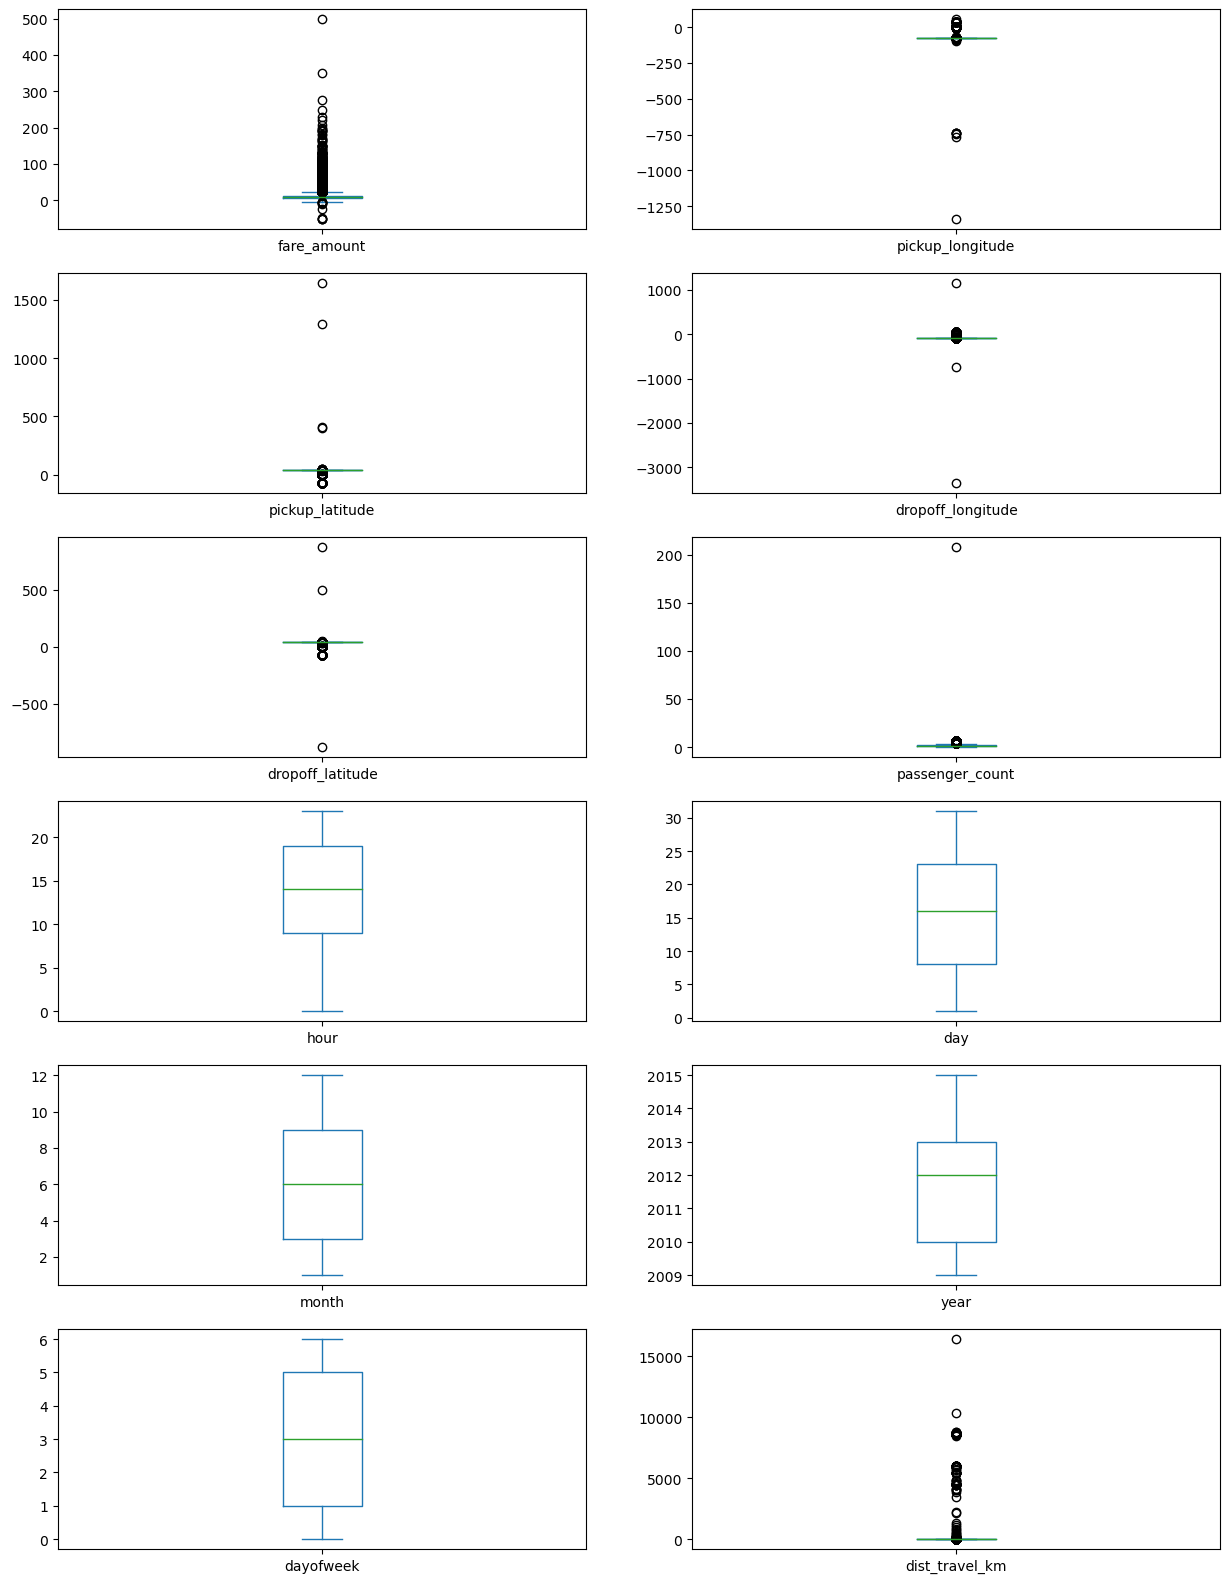

In [18]:
df.plot(kind = "box",subplots = True,layout = (6,2),figsize=(15,20))
#Boxplot to check the outliers
plt.show()

In [21]:
def remove_outlier(df1 , col):
    Q1 = df1[col].quantile(0.25)
    Q3 = df1[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1-1.5*IQR
    upper_whisker = Q3+1.5*IQR
    df[col] = np.clip(df1[col] , lower_whisker , upper_whisker)
    return df1
    
def treat_outliers_all(df1 , col_list):
    for c in col_list:
        df1 = remove_outlier(df , c)
    return df1

In [22]:
df = treat_outliers_all(df , df.iloc[: , 0::])

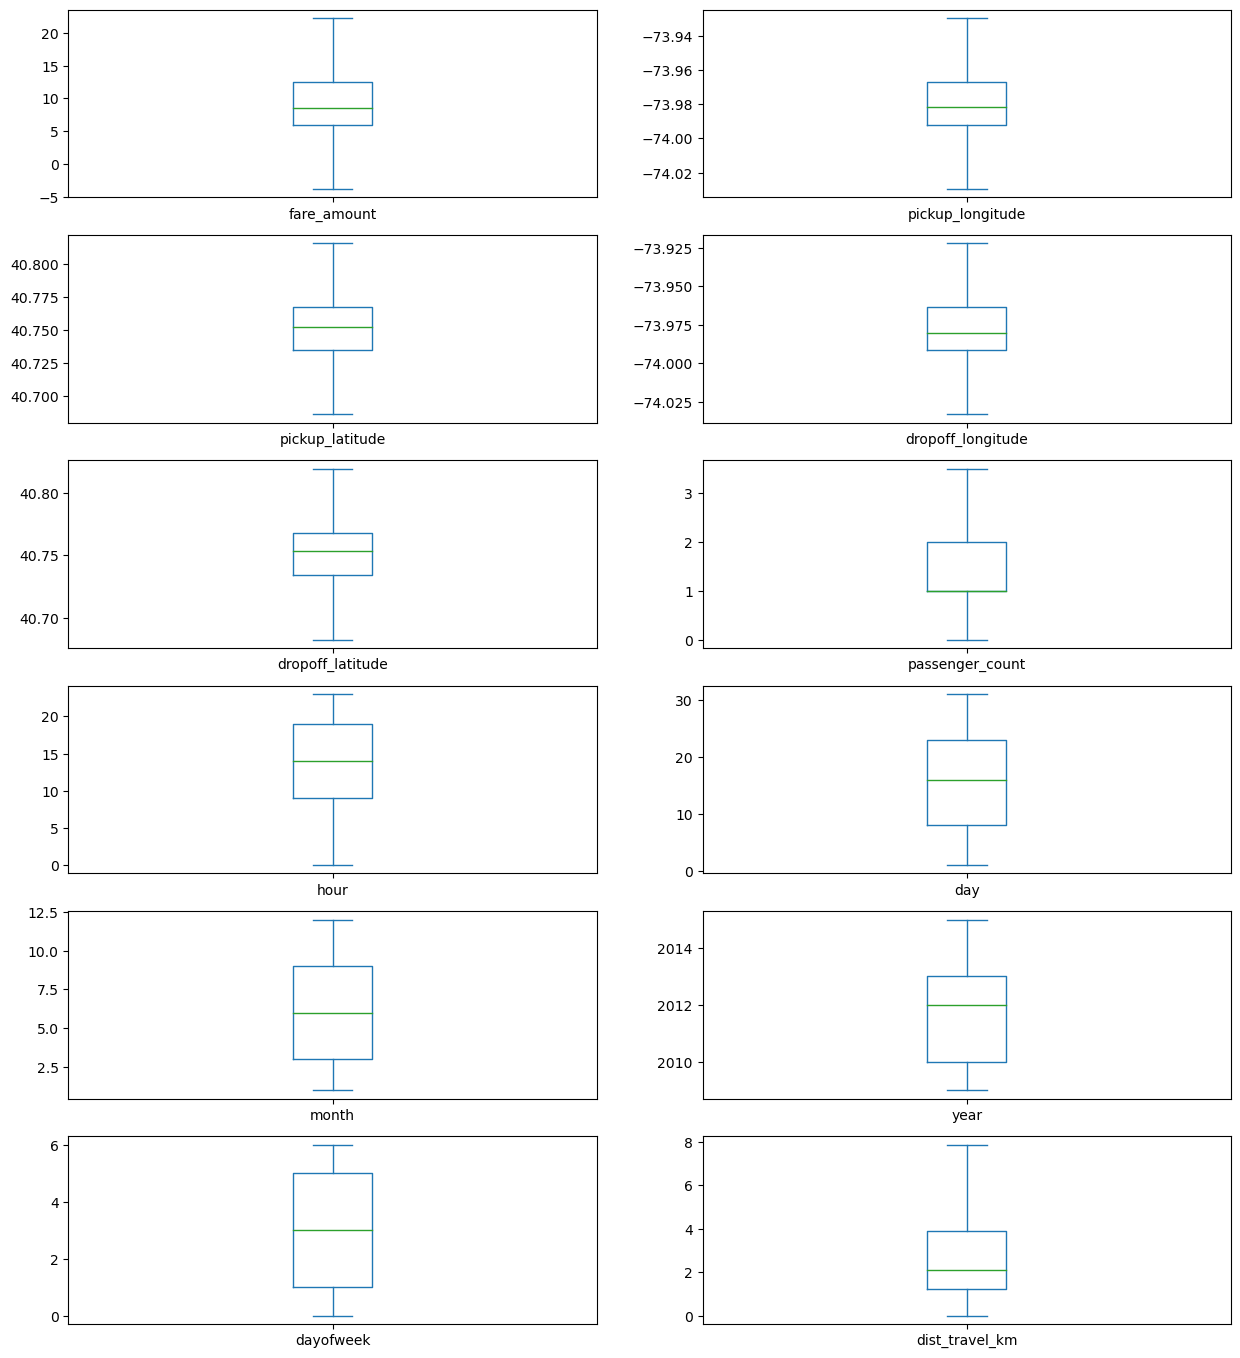

In [23]:
df.plot(kind = "box",subplots = True,layout = (7,2),figsize=(15,20))
plt.show()

In [24]:
corr = df.corr()
corr

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
fare_amount,1.000000,0.154053,-0.110857,0.218681,-0.125874,0.015798,-0.023605,0.004552,0.030815,0.141271,0.013664,0.844369
pickup_longitude,0.154053,1.000000,0.259496,0.425622,0.073313,-0.013202,0.011590,-0.003194,0.001168,0.010193,-0.024645,0.098074
pickup_latitude,-0.110857,0.259496,1.000000,0.048887,0.515736,-0.012879,0.029691,-0.001544,0.001561,-0.014247,-0.042304,-0.046825
dropoff_longitude,0.218681,0.425622,0.048887,1.000000,0.245670,-0.009304,-0.046560,-0.004008,0.002392,0.011347,-0.003337,0.186533
dropoff_latitude,-0.125874,0.073313,0.515736,0.245670,1.000000,-0.006329,0.019765,-0.003498,-0.001191,-0.009595,-0.031932,-0.038873
passenger_count,0.015798,-0.013202,-0.012879,-0.009304,-0.006329,1.000000,0.020260,0.002699,0.010353,-0.009743,0.048542,0.009729
hour,-0.023605,0.011590,0.029691,-0.046560,0.019765,0.020260,1.000000,0.004664,-0.003924,0.002162,-0.086956,-0.038348
day,0.004552,-0.003194,-0.001544,-0.004008,-0.003498,0.002699,0.004664,1.000000,-0.017358,-0.012165,0.005609,0.003080
month,0.030815,0.001168,0.001561,0.002392,-0.001191,0.010353,-0.003924,-0.017358,1.000000,-0.115860,-0.008785,0.011626
year,0.141271,0.010193,-0.014247,0.011347,-0.009595,-0.009743,0.002162,-0.012165,-0.115860,1.000000,0.006116,0.024270


<Axes: >

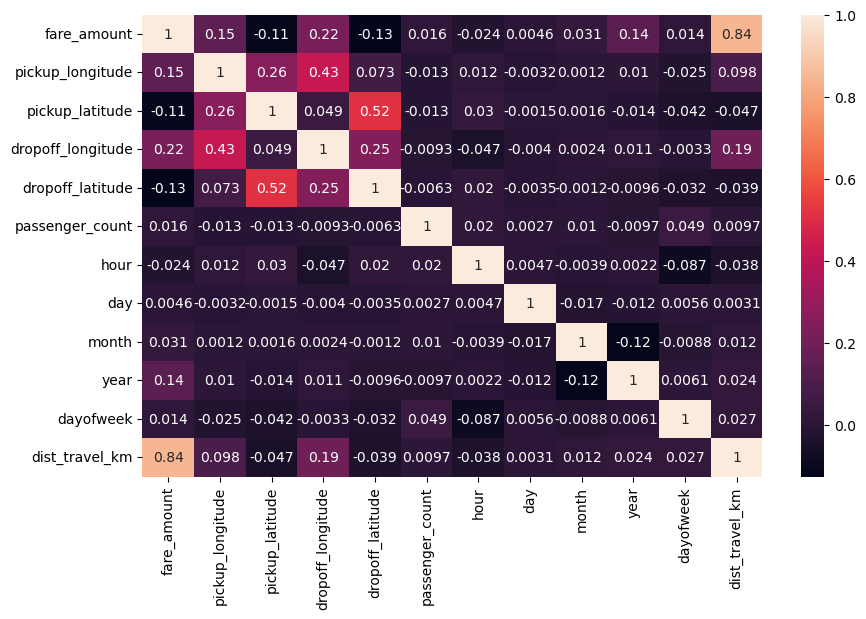

In [25]:
fig,axis = plt.subplots(figsize = (10,6))
sns.heatmap(df.corr(),annot = True)

In [26]:
df_x = df[['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','hour','day','month','year','dayofweek','dist_travel_km']]
df_y = df['fare_amount']

In [27]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.46, random_state=46)

In [28]:
df

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,year,dayofweek,dist_travel_km
0,7.50,-73.999817,40.738354,-73.999512,40.723217,1.0,19,7,5,2015,3,1.683323
1,7.70,-73.994355,40.728225,-73.994710,40.750325,1.0,20,17,7,2009,4,2.457590
2,12.90,-74.005043,40.740770,-73.962565,40.772647,1.0,21,24,8,2009,0,5.036377
3,5.30,-73.976124,40.790844,-73.965316,40.803349,3.0,8,26,6,2009,4,1.661683
4,16.00,-73.929787,40.744085,-73.973082,40.761247,3.5,17,28,8,2014,3,4.475450
...,...,...,...,...,...,...,...,...,...,...,...,...
199995,3.00,-73.987042,40.739367,-73.986525,40.740297,1.0,10,28,10,2012,6,0.112210
199996,7.50,-73.984722,40.736837,-74.006672,40.739620,1.0,1,14,3,2014,4,1.875050
199997,22.25,-73.986017,40.756487,-73.922036,40.692588,2.0,0,29,6,2009,0,7.865091
199998,14.50,-73.997124,40.725452,-73.983215,40.695416,1.0,14,20,5,2015,2,3.539715


In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
reg = LinearRegression()

In [31]:
reg.fit(x_train, y_train)

LinearRegression()

In [32]:
y_pred_lin = reg.predict(x_test)
print(y_pred_lin)

[ 9.71080842  7.93130063  9.03773769 ... 10.20762805  9.54503729
  5.97704907]


In [33]:
from sklearn.ensemble import RandomForestRegressor

In [38]:
rf = RandomForestRegressor(n_estimators=10)
rf.fit(x_train,y_train)

RandomForestRegressor(n_estimators=10)

In [39]:
y_pred_rf = rf.predict(x_test)
print(y_pred_rf)

[11.65  5.65  8.85 ...  8.9  10.48  5.35]


In [40]:
cols = ['Model', 'RMSE', 'R-Squared']

In [41]:
result_tabulation = pd.DataFrame(columns = cols)

In [42]:
from sklearn import metrics
from sklearn.metrics import r2_score
reg_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_lin))
reg_squared = r2_score(y_test, y_pred_lin)
full_metrics = pd.Series({'Model': "Linear Regression", 'RMSE' : reg_RMSE, 'R-Squared' : reg_squared})

In [43]:
result_tabulation = result_tabulation._append(full_metrics, ignore_index = True)

In [44]:
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regression,2.741174,0.744953


In [45]:
rf_RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred_rf))
rf_squared = r2_score(y_test, y_pred_rf)
full_metrics = pd.Series({'Model': "Random Forest ", 'RMSE':rf_RMSE, 'R-Squared': rf_squared})

In [46]:
result_tabulation = result_tabulation._append(full_metrics, ignore_index = True)

In [47]:
result_tabulation

,Model,RMSE,R-Squared
0,Linear Regression,2.741174,0.744953
1,Random Forest,2.526872,0.783272
